In [15]:

import import_ipynb
from src.dataloader import DataLoader
from src.dataclean import DataCleaner
from src.visualizer import Visualizer
from src.utils import flag_outliers
from src import dataunderstanding
from src.eda import EDAAnalyzer
from src.preprocess import PreprocessAndVisualize
from src.hypothesis import HypothesisTestingAndVisualization
from src.preprocess_model import ModelPreprocessing
from src.modeling import ModelBuilder
from src.modelinter import ModelInterpret



In [16]:

# Load
loader = DataLoader("data/MachineLearningRating_v3.txt")
df = loader.load_csv()
    
# Clean
cleaner = DataCleaner(df)
df = cleaner.fix_dtypes()
df = cleaner.handle_missing()
df = cleaner.add_metrics()
    
    

c:\Users\HP\Downloads\insurance-risk-project\src\dataloader.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(self.path, sep=sep, parse_dates=['TransactionMonth', 'VehicleIntroDate'], low_memory=False)


[INFO] Loaded 1000098 rows and 52 columns


c:\Users\HP\Downloads\insurance-risk-project\src\dataclean.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.df[col].fillna(self.df[col].median(), inplace=True)
c:\Users\HP\Downloads\insurance-risk-project\src\dataclean.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

=== Data Shape ===
(1000098, 54)

=== Missing Data (Top 10) ===
                         missing_count  missing_percent
NumberOfVehiclesInFleet        1000098        100.00000
LossRatio                       381634         38.15966
TransactionMonth                     0          0.00000
IsVATRegistered                      0          0.00000
UnderwrittenCoverID                  0          0.00000
PolicyID                             0          0.00000
Title                                0          0.00000
Language                             0          0.00000
Bank                                 0          0.00000
AccountType                          0          0.00000

=== Numeric Summary (Top 10) ===
                         count          mean           std        min  \
UnderwrittenCoverID  1000098.0  1.048175e+05  6.329371e+04        1.0   
PolicyID             1000098.0  7.956682e+03  5.290039e+03       14.0   
PostalCode           1000098.0  3.020601e+03  2.649854e+03        1

C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


[INFO] Variability Stats:
                                  mean           std           var  \
UnderwrittenCoverID       1.048175e+05  6.329371e+04  4.006094e+09   
PolicyID                  7.956682e+03  5.290039e+03  2.798451e+07   
PostalCode                3.020601e+03  2.649854e+03  7.021728e+06   
mmcode                    5.488056e+07  1.360059e+07  1.849762e+14   
RegistrationYear          2.010225e+03  3.261391e+00  1.063667e+01   
Cylinders                 4.046616e+00  2.939410e-01  8.640131e-02   
cubiccapacity             2.466869e+03  4.427106e+02  1.959927e+05   
kilowatts                 9.721553e+01  1.939061e+01  3.759957e+02   
NumberOfDoors             4.019239e+00  4.681854e-01  2.191976e-01   
CustomValueEstimate       2.212193e+05  2.650521e+05  7.025261e+10   
NumberOfVehiclesInFleet            NaN           NaN           NaN   
SumInsured                6.041727e+05  1.508332e+06  2.275065e+12   
CalculatedPremiumPerTerm  1.178757e+02  3.997017e+02  1.597615e+

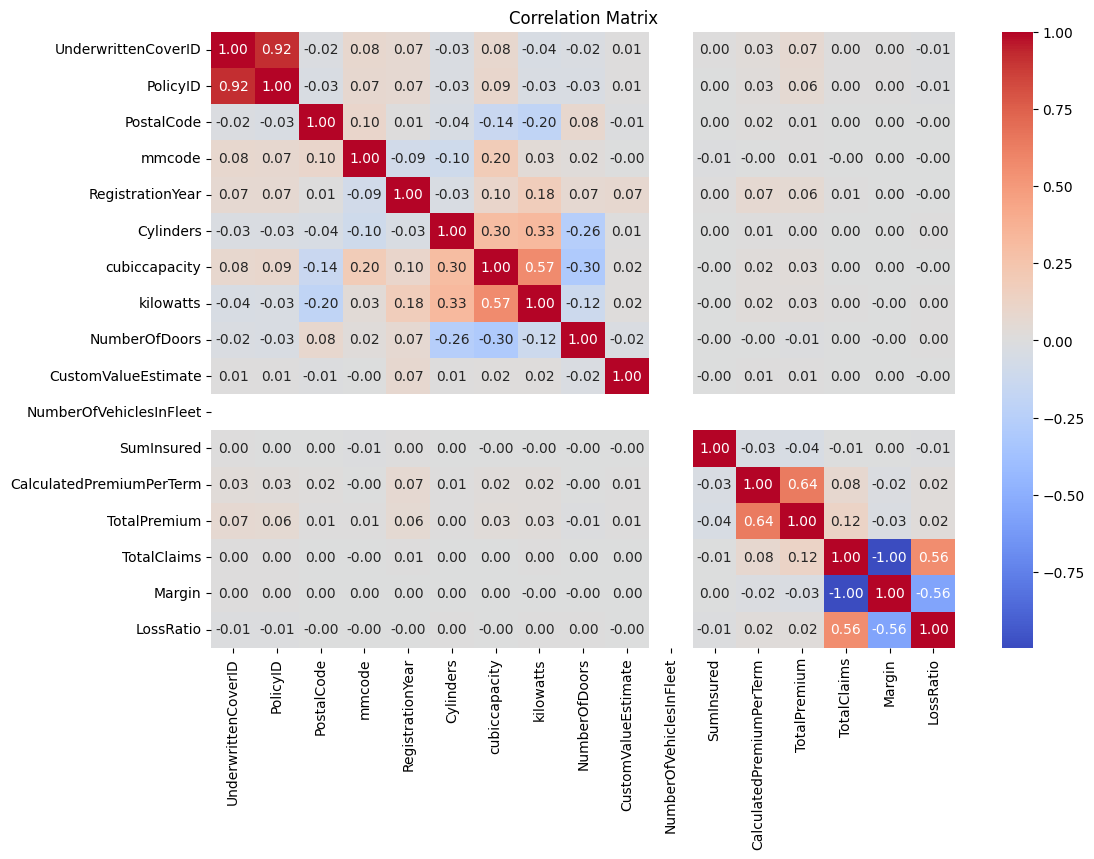

C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


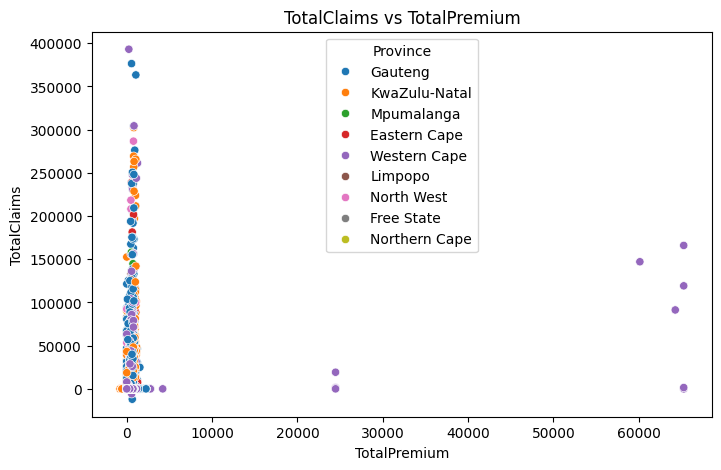

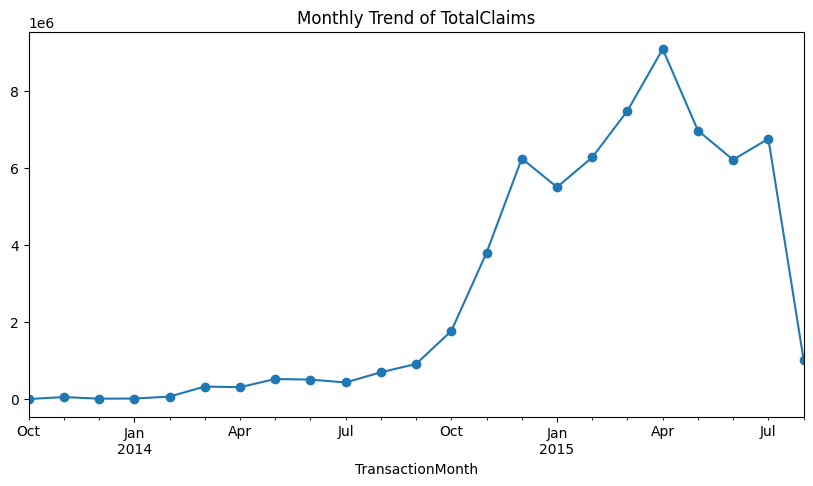

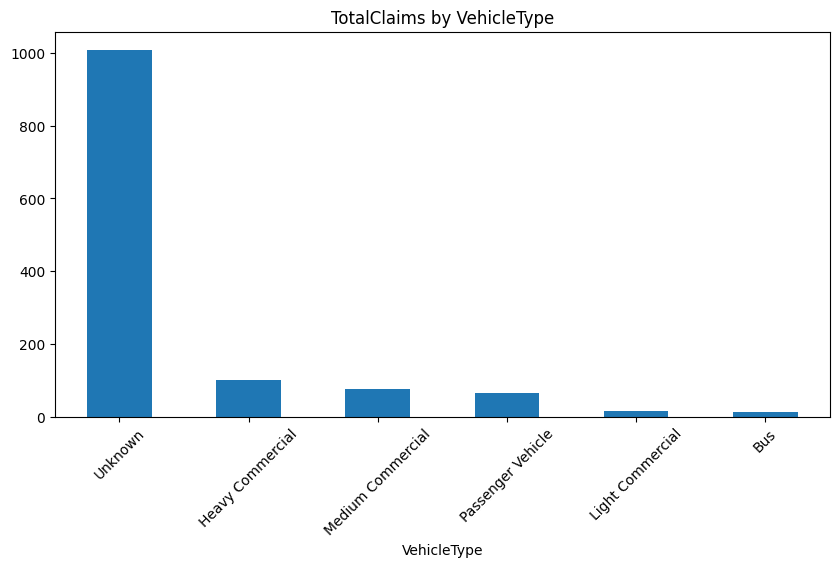

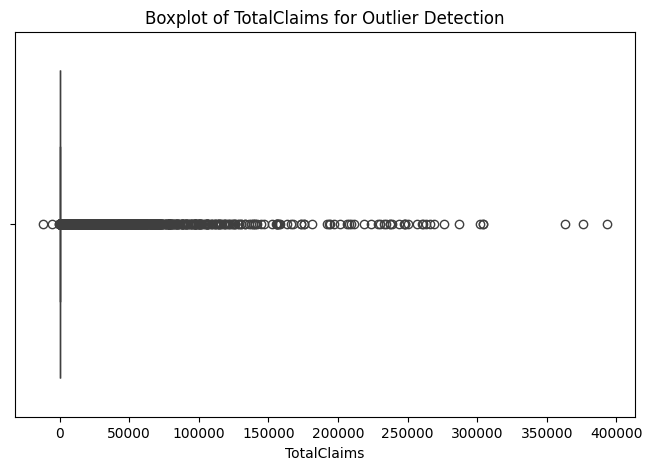

[INFO] TotalClaims outlier threshold: lower=0.0, upper=0.0


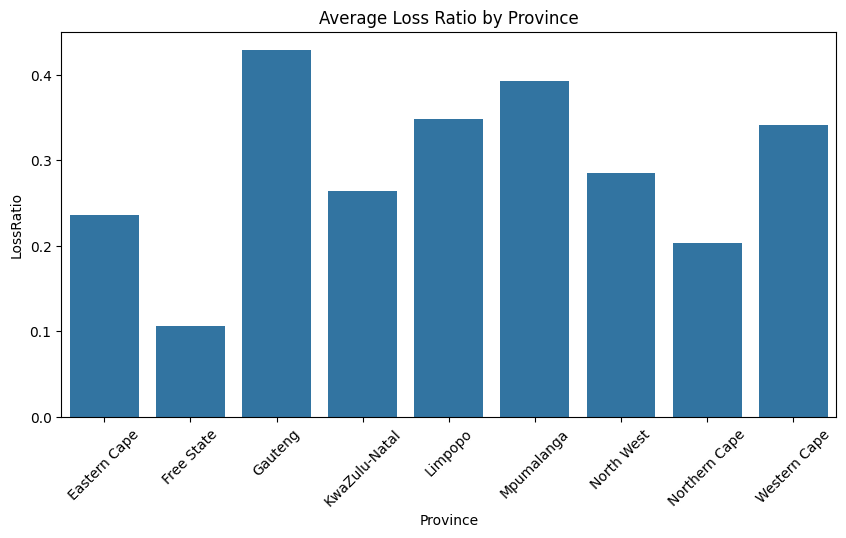

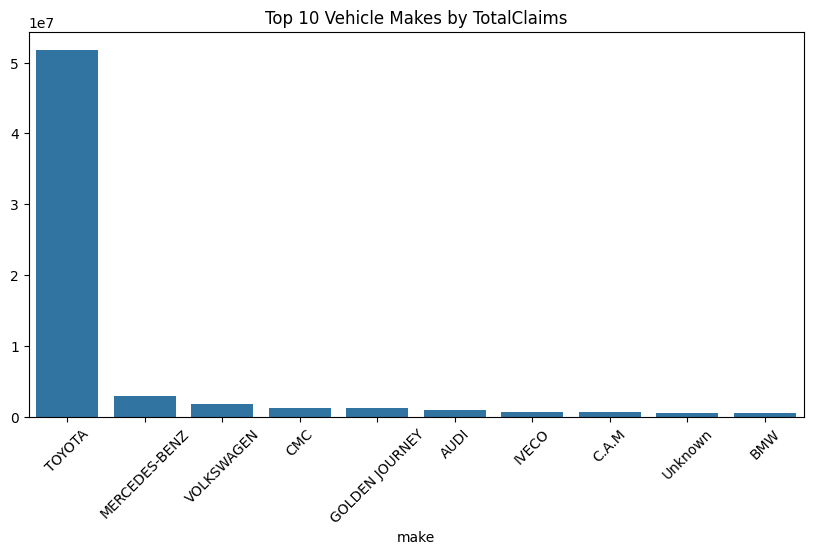

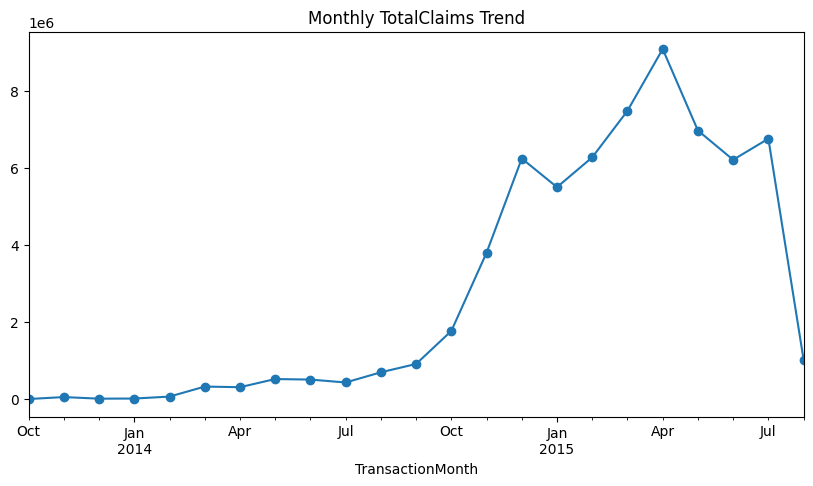

In [17]:
# Data Understanding
du = dataunderstanding.DataUnderstanding(df)
du.overview()

# EDA
eda = EDAAnalyzer(df)
eda.overview()
var_stats = eda.variability_stats()
print("[INFO] Variability Stats:")
print(var_stats[['mean','std','var','IQR','min','max']])
eda.correlation_matrix()
eda.scatter_plot('TotalPremium','TotalClaims', hue_col='Province')
eda.monthly_trends('TotalClaims')
eda.group_trends('VehicleType','TotalClaims')
df, lower, upper = eda.boxplot_outliers('TotalClaims')
print(f"[INFO] TotalClaims outlier threshold: lower={lower}, upper={upper}")
eda.creative_plots()
    
    

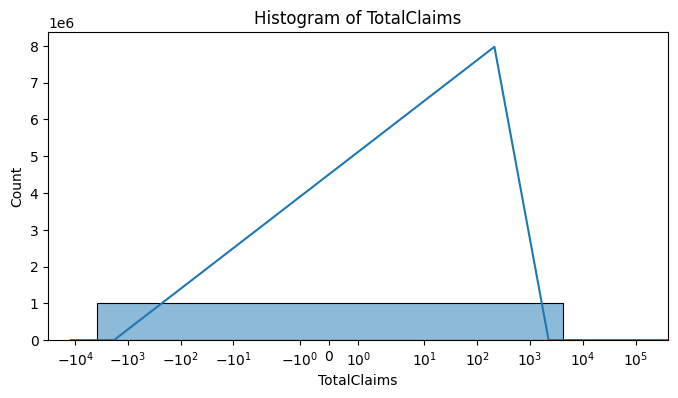

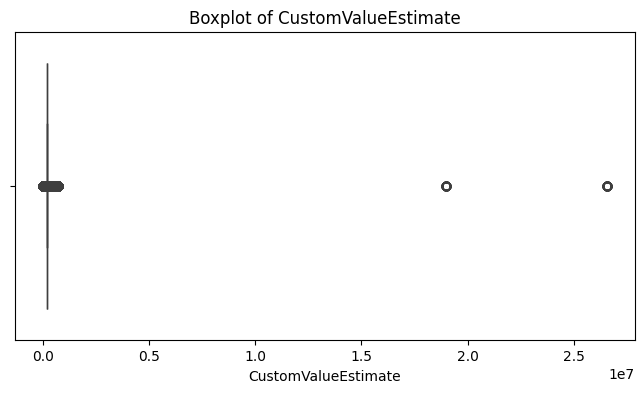

c:\Users\HP\Downloads\insurance-risk-project\src\visualizer.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


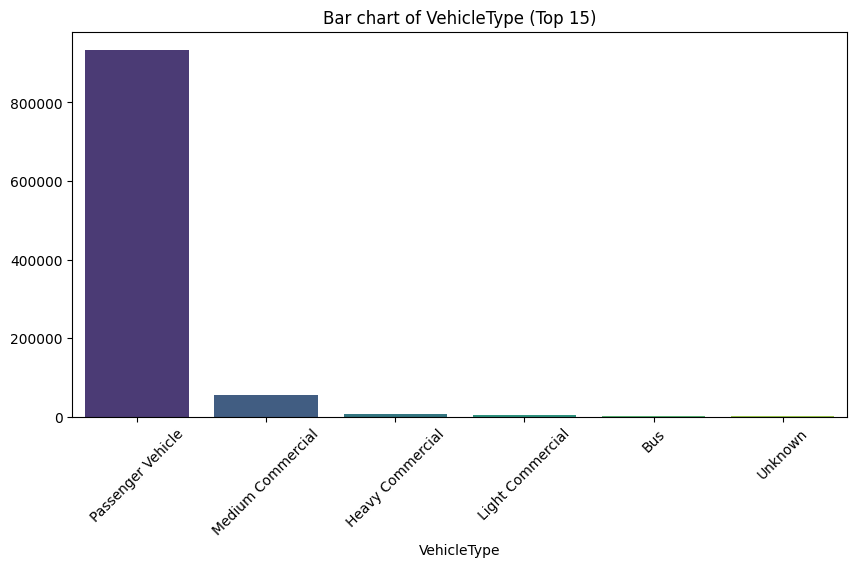

[INFO] Flagged 2788 extreme TotalClaims (>0.0)


In [18]:
# Visuals
viz = Visualizer(df)
viz.histogram("TotalClaims", log_scale=True)
viz.boxplot("CustomValueEstimate")
viz.bar_chart("VehicleType")

# Outlier detection
df, threshold = flag_outliers(df, "TotalClaims")
print(f"[INFO] Flagged {df['TotalClaims_is_outlier'].sum()} extreme TotalClaims (>{threshold})")
    
    

c:\Users\HP\Downloads\insurance-risk-project\src\preprocess.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='ClaimFreq', data=freq, palette='viridis')


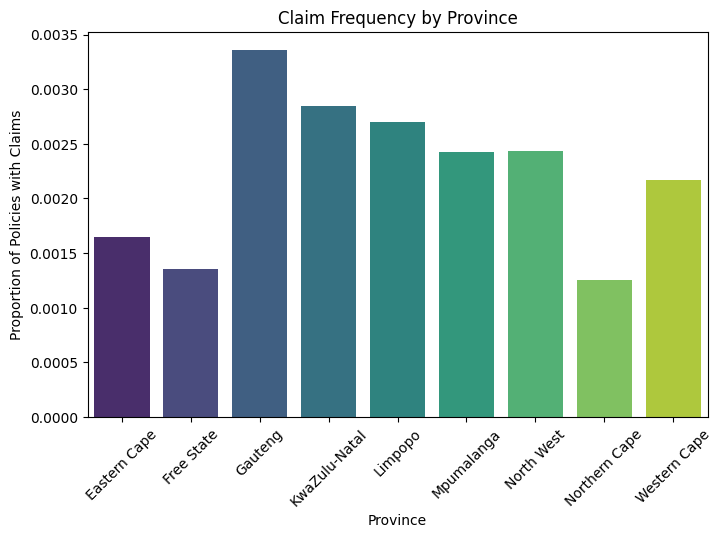

c:\Users\HP\Downloads\insurance-risk-project\src\preprocess.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='ClaimFreq', data=freq, palette='viridis')


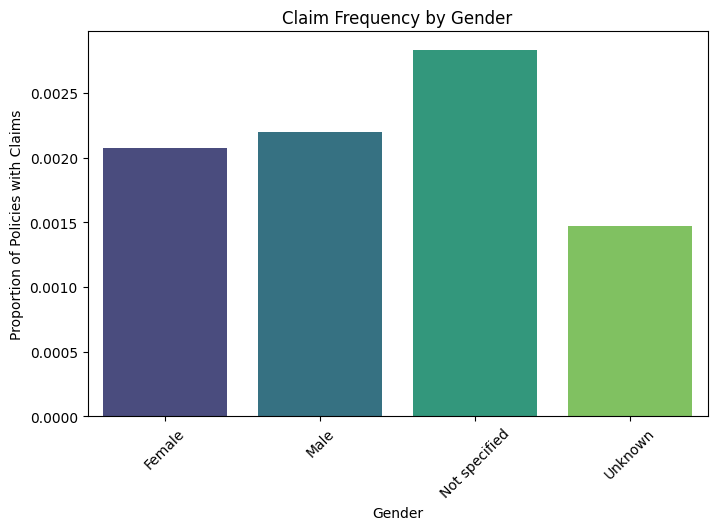

c:\Users\HP\Downloads\insurance-risk-project\src\preprocess.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='ClaimFreq', data=freq, palette='viridis')


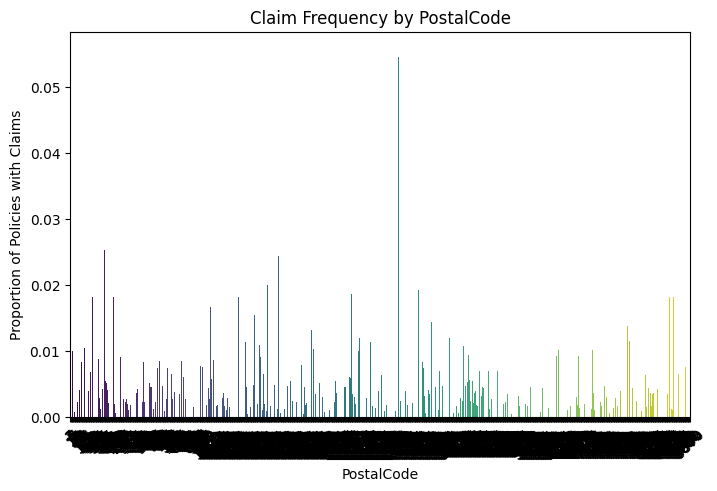

c:\Users\HP\Downloads\insurance-risk-project\src\preprocess.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y='Margin', data=self.df, palette='magma')


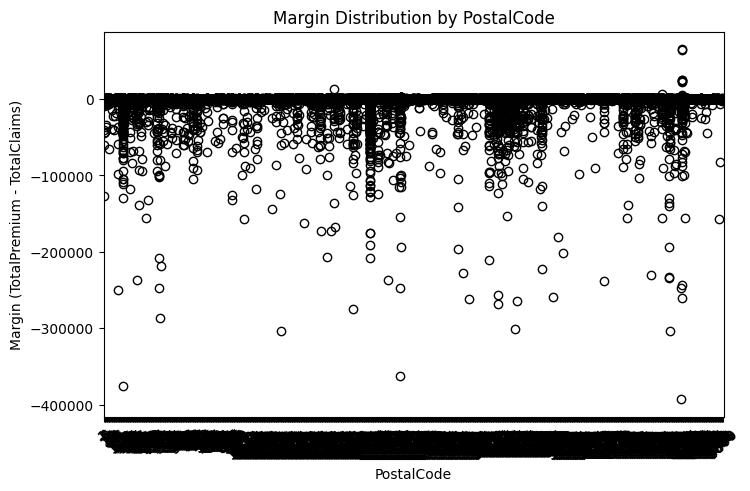

c:\Users\HP\Downloads\insurance-risk-project\src\preprocess.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y='ClaimSeverity', data=self.df, palette='cool')


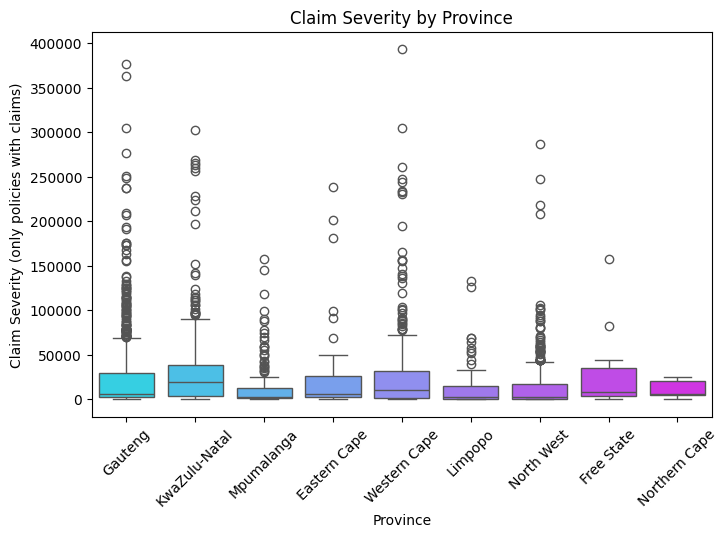


Chi-square test for ClaimFreq by Province: p-value = 0.0000 → Reject H0 → ClaimFreq differs by Province


c:\Users\HP\Downloads\insurance-risk-project\src\hypothesis.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y=target, data=freq, palette='viridis')


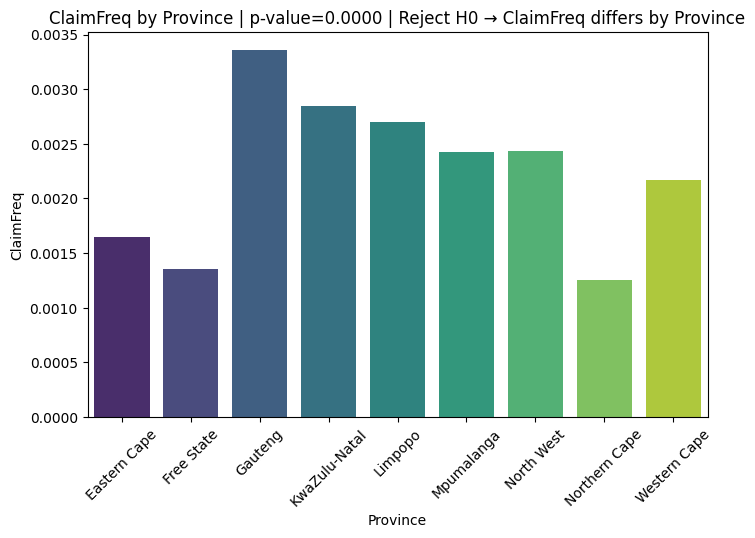


T-test for ClaimFreq between 2000 and 122 by PostalCode: p-value = 0.0615 → Fail to reject H0 → No significant difference in ClaimFreq between 2000 and 122


c:\Users\HP\Downloads\insurance-risk-project\src\hypothesis.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y=metric, data=subset, palette='magma')


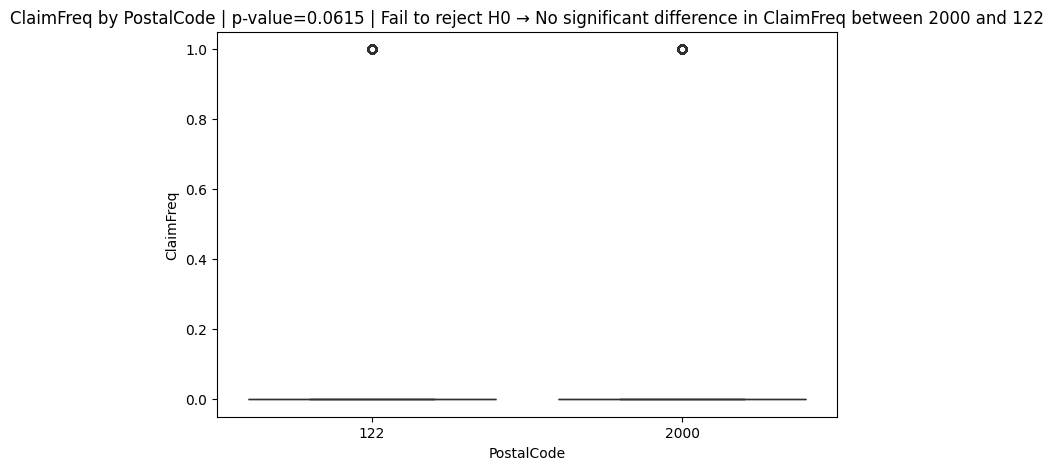


T-test for Margin between 2000 and 122 by PostalCode: p-value = 0.2445 → Fail to reject H0 → No significant difference in Margin between 2000 and 122


c:\Users\HP\Downloads\insurance-risk-project\src\hypothesis.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y=metric, data=subset, palette='magma')


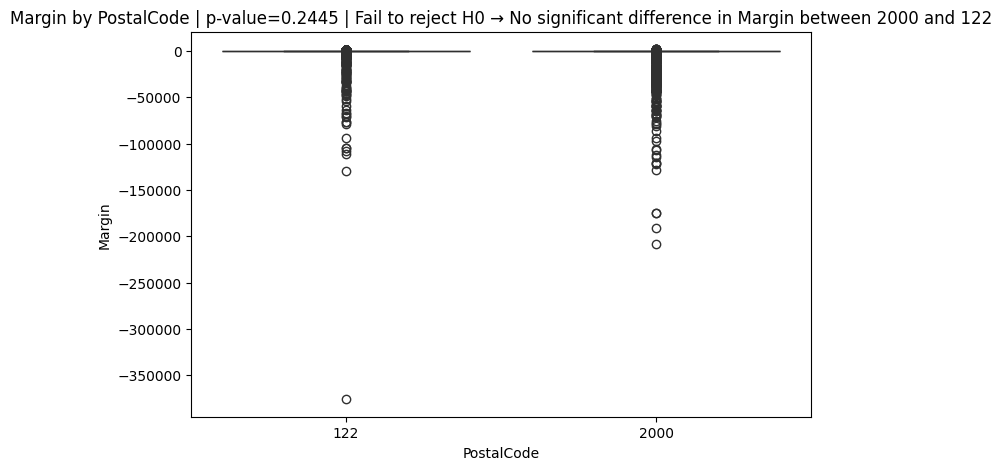


Chi-square test for ClaimFreq by Gender: p-value = 0.0040 → Reject H0 → ClaimFreq differs by Gender


c:\Users\HP\Downloads\insurance-risk-project\src\hypothesis.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y=target, data=freq, palette='viridis')


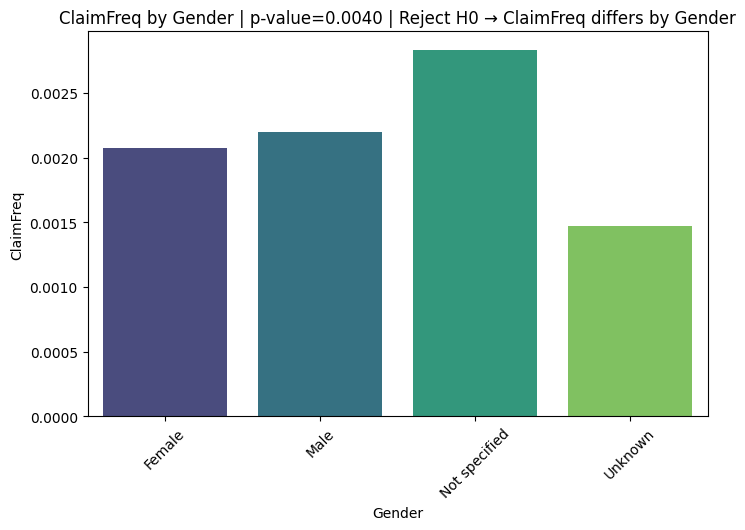


Task 3 Hypotheses Summary:
H1_Province: p-value=0.0000 → Reject H0 → ClaimFreq differs by Province
H2_Top2Zip_ClaimFreq: p-value=0.0615 → Fail to reject H0 → No significant difference in ClaimFreq between 2000 and 122
H3_Top2Zip_Margin: p-value=0.2445 → Fail to reject H0 → No significant difference in Margin between 2000 and 122
H4_Gender: p-value=0.0040 → Reject H0 → ClaimFreq differs by Gender


In [20]:
 # Preprocess & create metrics
prep_viz = PreprocessAndVisualize(df)
df = prep_viz.create_metrics()

# Task 3 specific visuals
prep_viz.plot_claim_frequency('Province')
prep_viz.plot_claim_frequency('Gender')
prep_viz.plot_claim_frequency('PostalCode')
prep_viz.plot_margin_distribution('PostalCode')
prep_viz.plot_claim_severity('Province')

# Hypothesis testing + visualization
hypo_viz = HypothesisTestingAndVisualization(df)
task3_results = hypo_viz.run_all_hypotheses()

# Print summary
print("\nTask 3 Hypotheses Summary:")
for h, (p, res) in task3_results.items():
    print(f"{h}: p-value={p:.4f} → {res}")
    
    

In [21]:
# ----------------- Task 4: Data preparation -----------------
prep = ModelPreprocessing(df)

df_claims = prep.filter_claims()            # Only policies with claims
df_claims = prep.process_datetime()         # Convert datetime to numeric
df_claims = prep.handle_missing(strategy='median')  # Fill missing values
df_claims = prep.encode_features(
    categorical_features=['Province','Gender','VehicleType']
)

X_train, X_test, y_train, y_test = prep.train_test_split(target='TotalClaims', test_size=0.3)

# ----------------- Task 4: Model Building -----------------
builder = ModelBuilder(X_train, X_test, y_train, y_test)
builder.train_linear_regression()
builder.train_random_forest(n_estimators=100, max_depth=6)
builder.train_xgboost(n_estimators=100, learning_rate=0.1)

results = builder.evaluate_models()
print("Model Evaluation Results:")
print(results)



AttributeError: 'ModelPreprocessing' object has no attribute 'process_datetime'